In [1]:
import os

In [2]:
os.system('make')
os.system('./TwoBody')

0

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw1 = np.loadtxt('data_task2/R_V')
t, r1, r2 = raw1[:, 0], raw1[:, 1:4], raw1[:, 4:7]
v1, v2 = raw1[:, 7:10], raw1[:, 10:13]
raw2 = np.loadtxt('data_task2/J')
j1, j2= raw2[:, 1:4], raw2[:, 4:7]

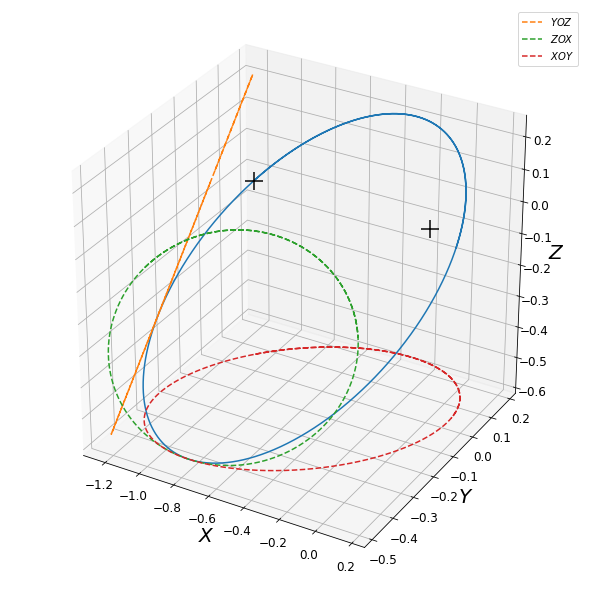

In [5]:
from mpl_toolkits.mplot3d import Axes3D
f, ax = plt.subplots(figsize=(8, 8), sharex='row')
ax = Axes3D(f)
#ax.axis('equal')
ax.plot3D(r1[:, 0], r1[:, 1], r1[:, 2])
ax.plot3D(r1[:, 0]*0+r1[:, 0].min(), r1[:, 1], r1[:, 2], linestyle='--', label='$YOZ$')
ax.plot3D(r1[:, 0], r1[:, 1]*0+r1[:, 1].min(), r1[:, 2], linestyle='--', label='$ZOX$')
ax.plot3D(r1[:, 0], r1[:, 1], r1[:, 2]*0+r1[:, 2].min(), linestyle='--', label='$XOY$')
ax.plot3D(r2[:, 0], r2[:, 1], r2[:, 2])
ax.scatter3D(r1[0, 0], r1[0, 1], marker='+', s=300, color='k')
ax.scatter3D(r2[0, 0], r2[0, 1], marker='+', s=300, color='k')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_zlabel(r'$Z$', fontsize=20)
ax.tick_params(labelsize=12)
ax.grid()
ax.legend()

/Users/chang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/chang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


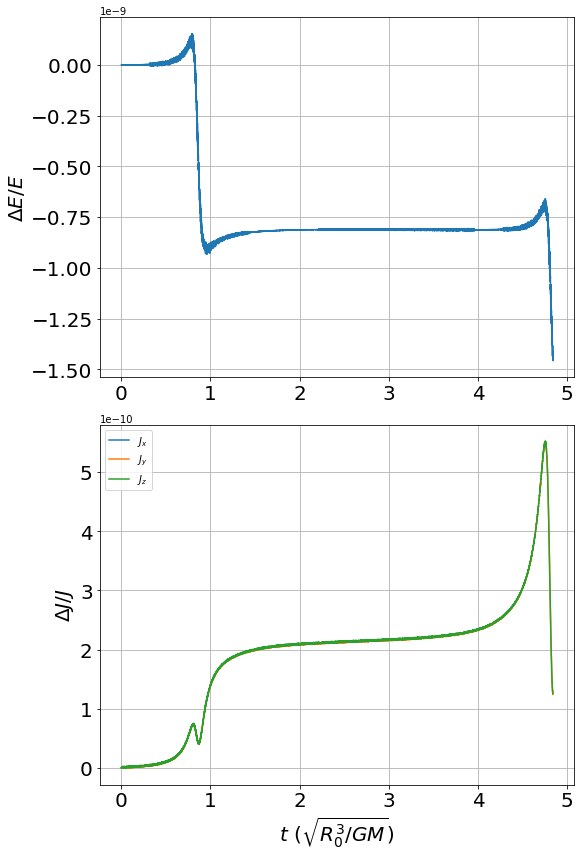

In [6]:
f, ax = plt.subplots(2, 1, figsize=(8, 12), sharex='row')

ax[0].set_ylabel(r'$\Delta E/E$', fontsize=20)
ax[0].tick_params(labelsize=20)
ax[0].grid()

ax[1].set_ylabel(r'$\Delta J/J$', fontsize=20)
ax[1].set_xlabel(r'$t\ (\sqrt{R_0^3/GM})$', fontsize=20)
ax[1].tick_params(labelsize=20)
ax[1].grid()

dr = np.sqrt(np.inner(r1 - r2, r1 - r2).diagonal())
q = 1e-5
m1, m2 = q / (1 + q), 1 / (1 + q)
K = 0.5 * m1 * np.inner(v1, v1).diagonal() + 0.5 * m2 * np.inner(
    v2, v2).diagonal()
V = -m1 * m2 / dr

ax[0].plot(t, (K + V - (K[0] + V[0])) / (K[0] + V[0]))
ax[1].plot(t, ((j1 + j2)[:, 0] - (j1 + j2)[0, 0]) / (j1 + j2)[0, 0], label=r'$J_x$')
ax[1].plot(t, ((j1 + j2)[:, 1] - (j1 + j2)[0, 1]) / (j1 + j2)[0, 1], label=r'$J_y$')
ax[1].plot(t, ((j1 + j2)[:, 2] - (j1 + j2)[0, 2]) / (j1 + j2)[0, 2], label=r'$J_z$')
ax[1].legend()

f.tight_layout()